## TP 4 - Perceptron, MLP

Dans ce TP nous allons explorer les réseaux de neurones pour la classification. Importez les librairies de base dont nous aurons besoin, comme aux TPs précédents:

In [22]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data

Tout comme dans le TP2 (reprenez le code), générez un problème de classification à deux classes et affichez les données.

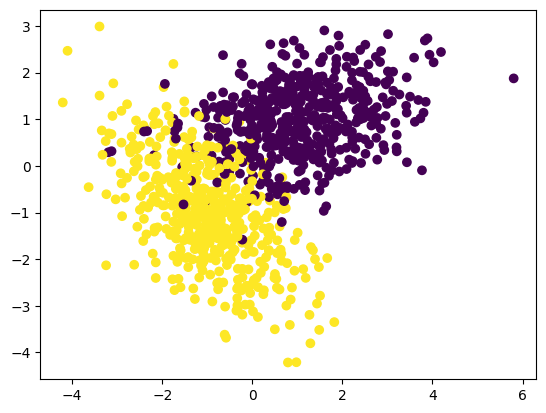

In [23]:
from sklearn.datasets import make_classification
x, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=26,n_samples=1000)
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

Tout comme dans le TP1, on commence par ajouter une dimension au vecteur x et dont les valeurs sont toutes à 1 (avec `add_dummy_feature`). Importez la classe `Perceptron` de `sklearn.linear_model` et réalisez son apprentissage sur les données. les coefficients de la droite peuvent être récupérés dans la propriété `coef_[0]` du perceptron, stockez les dans un vecteur nommé `w1`.  Programmez ensuite la descente de gradient batch : faites une boucle sur les époques et une sur les instances et modifiez le vecteur des poids pour chaque instance (c'est la version batch du sgd). Stockez les coefficient obtenus dans un vecteur nommé `w2`. Fixez le learning rate à 1 et le nombre d'itérations à 10. La fonction d'activation sera la fonction logistique. VOus devez appliquer la modification suivante pour les poids : $\textbf{w}^{t+1}=\textbf{w}^{t}-\alpha\textbf{x}_i(\sigma(\textbf{w}^T\textbf{x}_i)-y_i)$ Affichez `w1`et `w2`. Écrivez une fonction `plot_decision` afin d'afficher les frontières de décisions (inspirez vous du TP2 avec la classification logistique) obtenues avec w1 et w2. Les résultats sont-il proches ?

Coefficients du Perceptron (w1) : [-1.         -3.38718517 -3.9148618 ]
Epoch 1/10, Weights: [-1.00213898 -2.85726142 -3.79928256]
Epoch 2/10, Weights: [-1.00225038 -2.85741215 -3.79943942]
Epoch 3/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 4/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 5/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 6/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 7/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 8/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 9/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Epoch 10/10, Weights: [-1.0022504  -2.85741218 -3.79943945]
Coefficients après la descente de gradient batch (w2) : [-1.0022504  -2.85741218 -3.79943945]


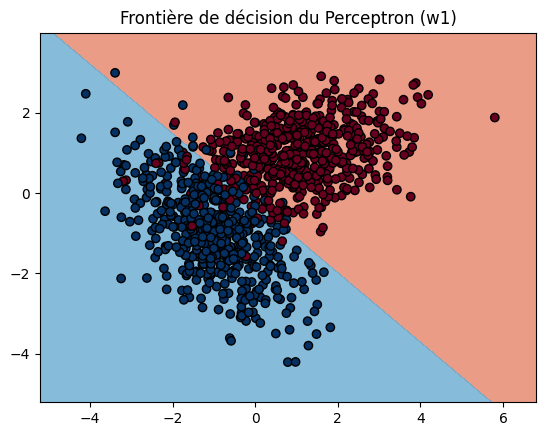

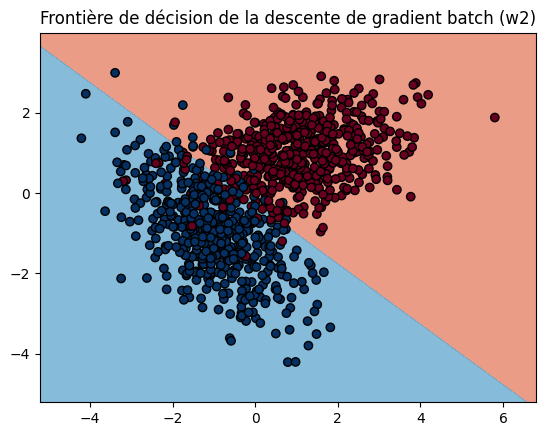

In [24]:
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import Perceptron

X = add_dummy_feature(x, value=1)

# ----- Étape 2 : Utilisation du Perceptron de scikit-learn -----
# Initialisation du perceptron
clf = Perceptron()
# Entraînement du perceptron sur les données
clf.fit(X, y)
# Récupération des coefficients du perceptron
w1 = clf.coef_[0]
print("Coefficients du Perceptron (w1) :", w1)

# ----- Étape 3 : Descente de gradient batch -----

# Fonction d'activation logistique
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fonction pour la descente de gradient batch
def gradient_descent_batch(X, y, epochs=10, learning_rate=1):
    # Initialisation des poids avec des petites valeurs aléatoires
    w = np.random.randn(X.shape[1])
    
    # Boucle sur les époques
    for epoch in range(epochs):
        # Boucle sur chaque instance de données
        for i in range(X.shape[0]):
            # Calcul de la sortie prédite avec la fonction sigmoïde
            z = np.dot(X[i], w)
            y_pred = sigmoid(z)
            
            # Mise à jour des poids (règle de mise à jour avec la fonction logistique)
            w -= learning_rate * X[i] * (y_pred - y[i])
        
        # Affichage des poids après chaque époque
        if epoch % 1 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Weights: {w}")
    
    return w

# Descente de gradient batch
w2 = gradient_descent_batch(X, y, epochs=10, learning_rate=1)
print("Coefficients après la descente de gradient batch (w2) :", w2)

# ----- Étape 4 : Fonction pour afficher la frontière de décision -----

def plot_decision(X, y, w, title):
    # Créer un espace pour les points
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Calculer les frontières de décision
    Z = sigmoid(np.dot(add_dummy_feature(np.c_[xx.ravel(), yy.ravel()]), w))
    Z = Z.reshape(xx.shape)
    
    # Affichage du graphique
    plt.contourf(xx, yy, Z, alpha=0.8, levels=[0, 0.5, 1], cmap='RdBu')
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k', cmap='RdBu')
    plt.title(title)
    plt.show()

# Afficher les frontières de décision
plot_decision(X, y, w1, "Frontière de décision du Perceptron (w1)")
plot_decision(X, y, w2, "Frontière de décision de la descente de gradient batch (w2)")

Comme le perceptron ne permet de faire que des séparations linéaires, son intérêt est limité dès lors que les données sont complexes. Néanmoins, il est possible de mettre des perceptrons en couche, comme montré dans les exemples suivants. Cela se nomme un MLP (Multi Layer Perceptron). On parlera alors d'entrées, de couches cachées et de couche de sortie pour le MLP.

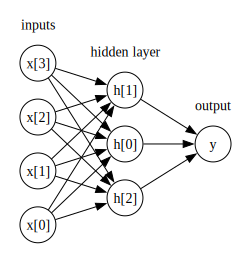

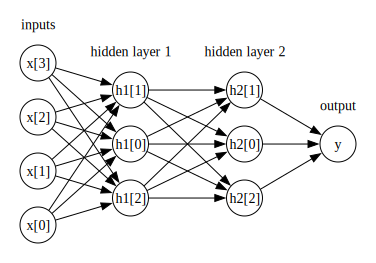

In [17]:
import mglearn
display(mglearn.plots.plot_single_hidden_layer_graph())
display(mglearn.plots.plot_two_hidden_layer_graph())

Importez la fonction `make_moons` de `sklearn.datasets` et créez un dataset (qui aura la forme de deux lunes (two moons)) avec 100 examples et un bruit de 0.25. Découpez le dataset en train/test puis effectuez l'apprentissage d'un MLP. Ce classifieur se nomme est `MLPClassifier`  et est disponible dans `sklearn.neural_network`. Essayez tout d'abord avec ces paramètres : 10 neurones sur une seule couche cachée, un solver lbfgs et 500 itérations maximum. Affichez les performances en test. Affichez les données (avec plot_data) et la frontière de séparation avec `mglearn.plots.plot_2d_separator(mlp, x, fill=True, alpha=.3)` avec `x` le dataset complet et `mlp` le MLP appris. Testez ensuite en faisant varier à l'aide d'une boucle le nombre de neurones cachés entre 10 et 90 par pas de 10, de façon à avoir deux couches cachées de même taille. Comparez les performances de ces modèles.

Performance du MLP sur le set de test avec 10 neurones dans une seule couche : 0.800


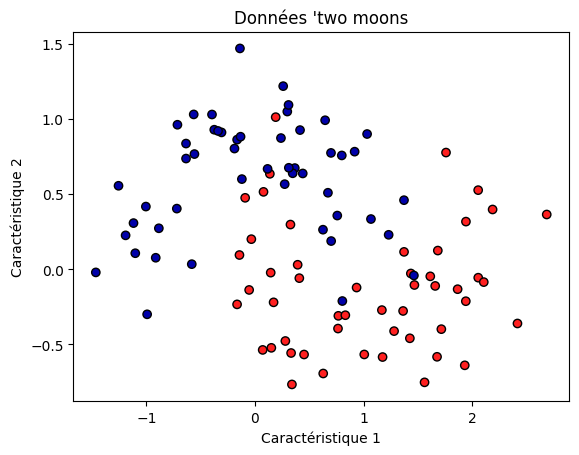

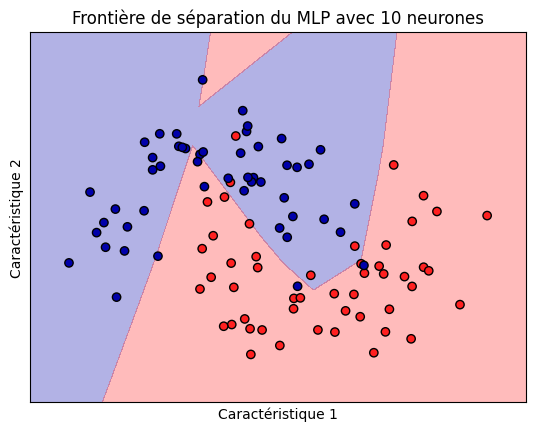

Nombre de neurones cachés : 10, Précision sur le test : 0.800
Nombre de neurones cachés : 20, Précision sur le test : 0.850
Nombre de neurones cachés : 30, Précision sur le test : 0.900
Nombre de neurones cachés : 40, Précision sur le test : 0.850
Nombre de neurones cachés : 50, Précision sur le test : 0.850
Nombre de neurones cachés : 60, Précision sur le test : 0.850
Nombre de neurones cachés : 70, Précision sur le test : 0.900
Nombre de neurones cachés : 80, Précision sur le test : 0.850
Nombre de neurones cachés : 90, Précision sur le test : 0.850


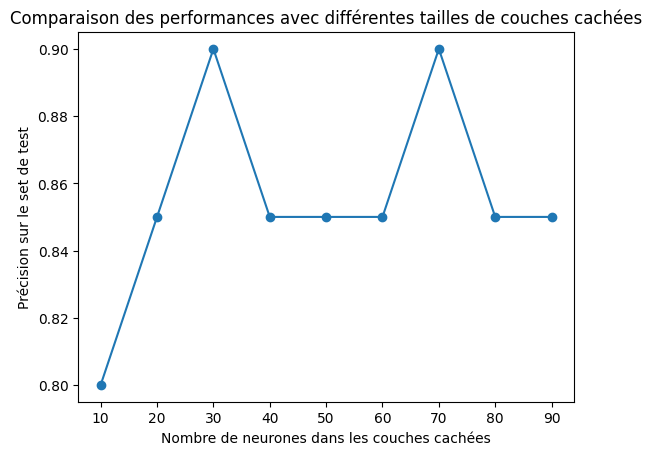

In [42]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import mglearn

# ----- Étape 1 : Génération du dataset "two moons" -----
x, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# ----- Étape 2 : Découpage en train/test -----
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ----- Étape 3 : Entraînement du MLP avec 10 neurones dans une seule couche -----
mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='lbfgs', max_iter=500, random_state=42)
mlp.fit(x_train, y_train)

# Évaluation sur le set de test
test_accuracy = mlp.score(x_test, y_test)
print(f"Performance du MLP sur le set de test avec 10 neurones dans une seule couche : {test_accuracy:.3f}")

# ----- Étape 4 : Affichage des données et de la frontière de séparation -----

def plot_data(x, y):
    plt.figure()
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mglearn.cm2, edgecolor='k')
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.title("Données 'two moons")
    plt.show()

# Afficher les données
plot_data(x, y)

# Afficher la frontière de séparation
mglearn.plots.plot_2d_separator(mlp, x, fill=True, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mglearn.cm2, edgecolor='k')
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.title("Frontière de séparation du MLP avec 10 neurones")
plt.show()

# ----- Étape 5 : Variation du nombre de neurones cachés -----
performance_list = []
neurons_range = range(10, 100, 10)

for n_neurons in neurons_range:
    # Modèle avec deux couches cachées de même taille
    mlp = MLPClassifier(hidden_layer_sizes=(n_neurons, n_neurons), solver='lbfgs', max_iter=500, random_state=42)
    mlp.fit(x_train, y_train)
    
    # Évaluer la performance sur le set de test
    test_accuracy = mlp.score(x_test, y_test)
    performance_list.append((n_neurons, test_accuracy))
    print(f"Nombre de neurones cachés : {n_neurons}, Précision sur le test : {test_accuracy:.3f}")

# ----- Étape 6 : Comparaison des performances -----
# Affichage des performances en fonction du nombre de neurones
neurons, performance = zip(*performance_list)
plt.plot(neurons, performance, marker='o')
plt.xlabel("Nombre de neurones dans les couches cachées")
plt.ylabel("Précision sur le set de test")
plt.title("Comparaison des performances avec différentes tailles de couches cachées")
plt.show()


Essayez sur un problème réel à présent et construisez un classifieur MLP sur les données iris, et affichez ses performances. Attention à bien normaliser les données avant de les traiter (utilisez un pipeline). C'est à vous de choisir les paramètres du MLP !

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import LabelEncoder

brut_data = pd.read_csv('iris.csv')

le = LabelEncoder()
y = le.fit_transform(brut_data["class"])

x = brut_data[["petal_length", "petal_width"]].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10), 
                    max_iter=1000, 
                    solver='adam',  
                    activation='relu', 
                    random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

pipeline.fit(x_train, y_train)



test_accuracy = pipeline.score(x_test, y_test)
print(f"Précision sur le set de test : {test_accuracy}")




Précision sur le set de test : 1.0


Reprenez l'ensemble des chiffres manuscrits à reconnaître comme dans le TP précédent. Créez un MLP pour les classer et affichez ses performances. Utilisez deux couches cachées, un solver de type sgd ou lbfgs, une fonction d'activation de type relu ou logistic et les paramètres suivants : alpha=0.0001, tol=0.01, n_iter_no_change=30 et learning_rate_init=.1. Affichez les performances et cherchez manuellement les meilleurs paramètres : nombre de neurones sur les couches cachées, solver et fonction d'activation.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# ----- Étape 1 : Charger le dataset MNIST -----
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# ----- Étape 2 : Normaliser et découper les données -----
X = X / 255.0  # Normalisation des pixels [0, 255] à [0, 1]
y = y.astype(int)  # Conversion des labels en entiers (remplacez np.int par int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Étape 3 : Création du pipeline avec normalisation et MLP -----
# Création du classifieur MLP avec les paramètres spécifiés
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100),  # Deux couches cachées de 100 neurones chacune
                    solver='sgd',  # Utilisation de l'optimiseur Stochastic Gradient Descent
                    activation='relu',  # Fonction d'activation ReLU
                    alpha=0.0001,  # Pénalité L2
                    tol=0.01,  # Tolérance pour l'arrêt
                    n_iter_no_change=30,  # Nombre d'itérations sans amélioration avant d'arrêter
                    learning_rate_init=0.1,  # Taux d'apprentissage initial
                    max_iter=500,  # Maximum 500 itérations
                    random_state=42)

# Pipeline qui standardise les données avant d'entraîner le MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation des données
    ('mlp', mlp)  # Modèle MLP
])

# ----- Étape 4 : Entraînement du modèle -----
pipeline.fit(X_train, y_train)

# ----- Étape 5 : Évaluation du modèle -----
# Précision sur l'ensemble de test
test_accuracy = pipeline.score(X_test, y_test)
print(f"Précision sur le set de test : {test_accuracy:.3f}")

# Rapport de classification détaillé
y_pred = pipeline.predict(X_test)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision sur le set de test : 0.965

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.98      0.99      1600
           2       0.90      0.96      0.93      1380
           3       0.98      0.95      0.97      1433
           4       0.95      0.98      0.96      1295
           5       0.95      0.97      0.96      1273
           6       0.98      0.97      0.97      1396
           7       0.96      0.97      0.97      1503
           8       0.97      0.95      0.96      1357
           9       0.97      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.97      0.96      0.96     14000



Trouver les meilleurs paramètres manuellement est plus que difficile. Pour éviter cela on peut faire un GridSearch comme dans le TP précédent. Pour cela on commence par fixer les paramètres à explorer et on normalise des données (pour éviter d'utiliser un pipeline avec le gridsearch). Appliquez un grid search, affichez les paramètres du meilleur modèle (sont-ils proches de ceux que vous aviez trouvé ?), et appliquez le meilleur modèle sur les données de test (normalisées).

In [ ]:
#on fixe les paramètres à explorer 
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,30),(40,40),(50,50),(60,60),(70,70)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'lbfgs']
}
#on normalise les données
x_train_scaled=std_scaler.fit(x_train)
x_train_scaled=std_scaler.transform(x_train)
x_test_scaled=std_scaler.transform(x_test)

#on fait le grid search : à vous


